In [ ]:
import pandas as pd
import os
import gdown

DATA_SOURCE = 'https://drive.google.com/file/d/1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti/view?usp=sharing'

def inspect_data(source):
    """
    Downloads dataset using gdown (if URL) and prints summary information.
    """
    print(f"--- Processing source: {source[:50]}... ---\n")

    target_file = source # Default to assuming it's a local path

    try:
        # 1. Handle Google Drive URLs using gdown
        if 'drive.google.com' in source or 'http' in source:
            print(">> Detected URL. Attempting download with gdown...")
            # fuzzy=True helps gdown handle the 'view?usp=sharing' links correctly
            # output=None lets gdown try to find the original filename
            downloaded_path = gdown.download(source, quiet=False, fuzzy=True)

            if not downloaded_path:
                print("Error: Download failed or returned no file.")
                return

            target_file = downloaded_path
            print(f"\n>> Download successful: {target_file}")

        # 2. Load Data
        print(f">> Loading dataset from {target_file} (160MB may take 10-30 seconds)...")

        # Determine loader based on file extension
        if target_file.endswith('.xlsx') or target_file.endswith('.xls'):
            df = pd.read_excel(target_file)
        elif target_file.endswith('.parquet'):
            df = pd.read_parquet(target_file)
        elif target_file.endswith('.json'):
            df = pd.read_json(target_file)
        else:
            # Default to CSV
            df = pd.read_csv(target_file, low_memory=False)

        print(">> Load Complete.\n")

        # 3. Basic Info
        print("=== 1. DATASET INFO ===")
        df.info(verbose=True)
        print("\n" + "="*50 + "\n")

        # 4. Preview Data
        print("=== 2. FIRST 5 ROWS ===")
        pd.set_option('display.max_columns', None)
        print(df.head())
        print("\n" + "="*50 + "\n")

        # 5. Numerical Summary
        print("=== 3. STATISTICAL SUMMARY ===")
        print(df.describe())
        print("\n" + "="*50 + "\n")

        # 6. Missing Values
        print("=== 4. MISSING VALUES (Only showing columns with gaps) ===")
        missing_counts = df.isnull().sum()
        if missing_counts.sum() == 0:
            print("No missing values found!")
        else:
            print(missing_counts[missing_counts > 0])
        print("\n" + "="*50 + "\n")

        # 7. Unique Value Counts
        print("=== 5. UNIQUE VALUES PER COLUMN ===")
        for col in df.columns:
            unique_count = df[col].nunique()
            dtype = df[col].dtype
            print(f"{col} ({dtype}): {unique_count} unique values")

    except Exception as e:
        print(f"\nERROR: An error occurred.\nDetails: {e}")
        print("\nTIP: Ensure you have installed gdown: 'pip install gdown'")

if __name__ == "__main__":
    if "PASTE_YOUR_LINK" in DATA_SOURCE:
        print("Please update the 'DATA_SOURCE' variable in the script with your actual link/path.")
    else:
        inspect_data(DATA_SOURCE)

--- Processing source: https://drive.google.com/file/d/1e5sWHP0Hzxkw0VGPJ... ---

>> Detected URL. Attempting download with gdown...


Downloading...
From (original): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti
From (redirected): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti&confirm=t&uuid=d9be6e37-a95b-472c-ae6d-21300f706cdc
To: /content/2024_S1_cdm_ccsds_AE.csv
100%|██████████| 168M/168M [00:01<00:00, 104MB/s]



>> Download successful: 2024_S1_cdm_ccsds_AE.csv
>> Loading dataset from 2024_S1_cdm_ccsds_AE.csv (160MB may take 10-30 seconds)...
>> Load Complete.

=== 1. DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185511 entries, 0 to 185510
Data columns (total 117 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    conjunction_id                              int64  
 1    comment_header                              object 
 2    creation_date                               object 
 3    originator                                  object 
 4    message_id                                  object 
 5    event_id                                    int64  
 6    comment_relative_metadata_data              object 
 7    tca                                         object 
 8    miss_distance                               float64
 9    relative_speed                              float64
 10   relative_p

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import numpy as np

DATA_SOURCE = 'https://drive.google.com/file/d/1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti/view?usp=sharing'
sns.set_style("whitegrid")
print("Setup Complete. Libraries imported.")

Setup Complete. Libraries imported.


In [ ]:
def load_data(source):
    print("--- LOADING DATA ---")
    target_file = source
    if 'drive.google.com' in source or 'http' in source:
        # fuzzy=True handles 'view?usp=sharing' links
        target_file = gdown.download(source, quiet=False, fuzzy=True)

    df = pd.read_csv(target_file, low_memory=False)

    # Drop constant/empty columns to save memory
    nunique = df.nunique()
    cols_to_drop = nunique[nunique <= 1].index
    df_clean = df.drop(cols_to_drop, axis=1)

    # Parse Dates
    date_cols = ['tca', 'start_screen_period', 'stop_screen_period', 'creation_date']
    for col in date_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

    print(f"Data Loaded. Shape: {df_clean.shape}")
    return df_clean

# Execute Load
df = load_data(DATA_SOURCE)

--- LOADING DATA ---


Downloading...
From (original): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti
From (redirected): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti&confirm=t&uuid=a5df39b1-e25b-4619-a524-bf7f9580d87b
To: /content/2024_S1_cdm_ccsds_AE.csv
100%|██████████| 168M/168M [00:00<00:00, 169MB/s]
/tmp/ipython-input-2951646490.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
/tmp/ipython-input-2951646490.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')


Data Loaded. Shape: (185511, 52)


In [ ]:
print("--- ADDING FEATURES ---")

# 1. Log Probability
# We add a tiny epsilon (1e-30) to avoid log(0) errors
df['log_collision_prob'] = np.log10(df['collision_probability'].replace(0, 1e-30))

# 2. Altitude Calculation (km)
# R = sqrt(x^2 + y^2 + z^2) - Earth Radius (6378 km)
if all(col in df.columns for col in ['object1_x', 'object1_y', 'object1_z']):
    R = np.sqrt(df['object1_x']**2 + df['object1_y']**2 + df['object1_z']**2)
    df['altitude_km'] = R - 6378.137
    # Filter outliers (Keep 100km to 40,000km)
    df = df[(df['altitude_km'] > 100) & (df['altitude_km'] < 40000)]

# 3. Risk Classification (Ground Truth)
# 1e-4 is the standard "Red Alert" threshold in the industry
RISK_THRESHOLD = 1e-4
df['risk_label'] = df['collision_probability'].apply(lambda x: 'High Risk' if x >= RISK_THRESHOLD else 'Low Risk')

# 4. Geometry Classification (B-Plane)
def classify_geometry(row):
    r = abs(row.get('relative_position_r', 0))
    t = abs(row.get('relative_position_t', 0))
    n = abs(row.get('relative_position_n', 0))
    if r > t and r > n: return 'Radial (Vertical Pass)'
    elif t > r and t > n: return 'In-Track (Horizontal Pass)'
    else: return 'Cross-Track (Side Pass)'

if 'relative_position_r' in df.columns:
    df['geometry_type'] = df.apply(classify_geometry, axis=1)

# 5. Time to TCA (Warning Time)
if 'start_screen_period' in df.columns and 'tca' in df.columns:
    df['hours_to_tca'] = (df['tca'] - df['start_screen_period']).dt.total_seconds() / 3600

print("Feature Engineering Complete.")
print(f"Final Dataset Shape: {df.shape}")

--- ADDING FEATURES ---
Feature Engineering Complete.
Final Dataset Shape: (185511, 57)


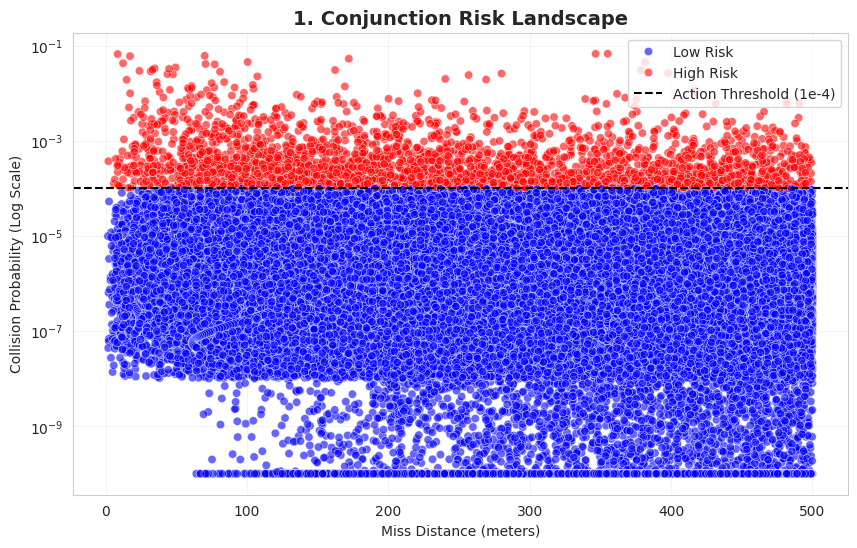

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='miss_distance',
    y='collision_probability',
    hue='risk_label',
    alpha=0.6,
    palette={'High Risk': 'red', 'Low Risk': 'blue'}
)
plt.yscale('log')
plt.title('1. Conjunction Risk Landscape', fontweight='bold', fontsize=14)
plt.xlabel('Miss Distance (meters)')
plt.ylabel('Collision Probability (Log Scale)')
plt.axhline(y=1e-4, color='black', linestyle='--', label='Action Threshold (1e-4)')
plt.legend(loc='upper right')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

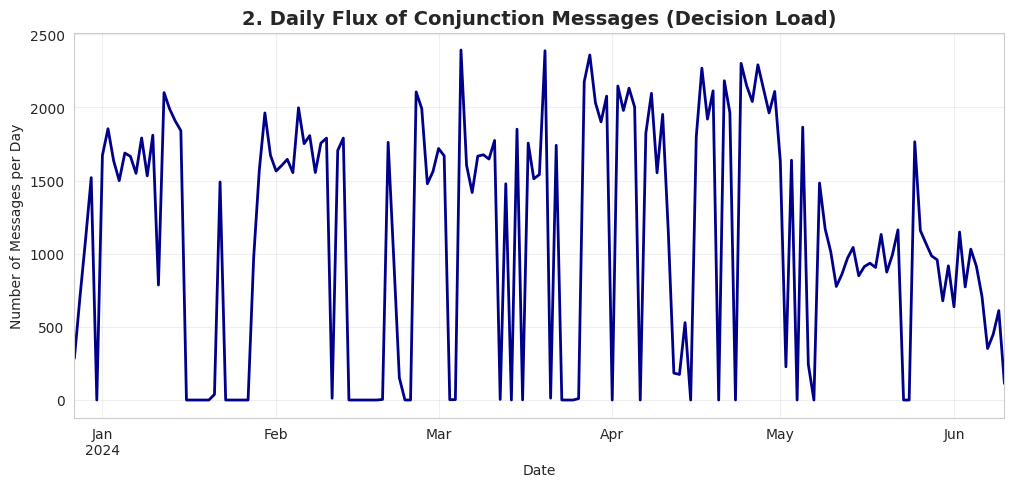

In [ ]:
plt.figure(figsize=(12, 5))
if 'start_screen_period' in df.columns:
    # Resample by Day
    daily_counts = df.resample('D', on='start_screen_period').size()
    daily_counts.plot(kind='line', color='darkblue', lw=2)
    plt.title('2. Daily Flux of Conjunction Messages (Decision Load)', fontweight='bold', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Number of Messages per Day')
    plt.grid(True, alpha=0.3)
else:
    print("Error: 'start_screen_period' column missing or empty.")
plt.show()

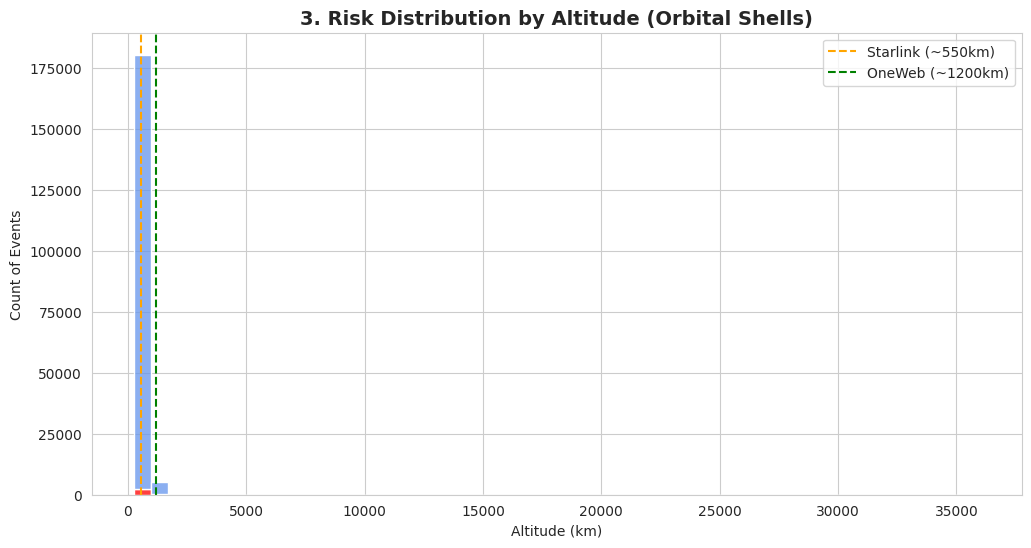

In [ ]:
plt.figure(figsize=(12, 6))
if 'altitude_km' in df.columns:
    sns.histplot(
        data=df,
        x='altitude_km',
        hue='risk_label',
        multiple='stack',
        bins=50,
        palette={'High Risk': 'red', 'Low Risk': 'cornflowerblue'},
        edgecolor='white'
    )
    plt.title('3. Risk Distribution by Altitude (Orbital Shells)', fontweight='bold', fontsize=14)
    plt.xlabel('Altitude (km)')
    plt.ylabel('Count of Events')

    plt.axvline(x=550, color='orange', linestyle='--', label='Starlink (~550km)')
    plt.axvline(x=1200, color='green', linestyle='--', label='OneWeb (~1200km)')
    plt.legend()
else:
    print("Error: Altitude calculation failed (missing state vector columns).")
plt.show()

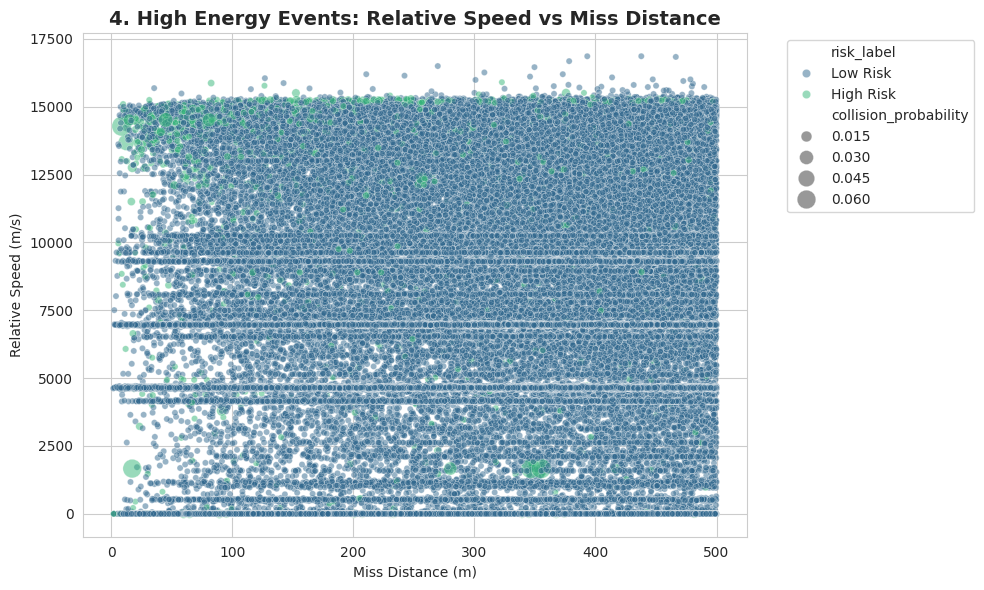

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='miss_distance',
    y='relative_speed',
    hue='risk_label',
    size='collision_probability',
    sizes=(20, 200),
    alpha=0.5,
    palette='viridis'
)
plt.title('4. High Energy Events: Relative Speed vs Miss Distance', fontweight='bold', fontsize=14)
plt.ylabel('Relative Speed (m/s)')
plt.xlabel('Miss Distance (m)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

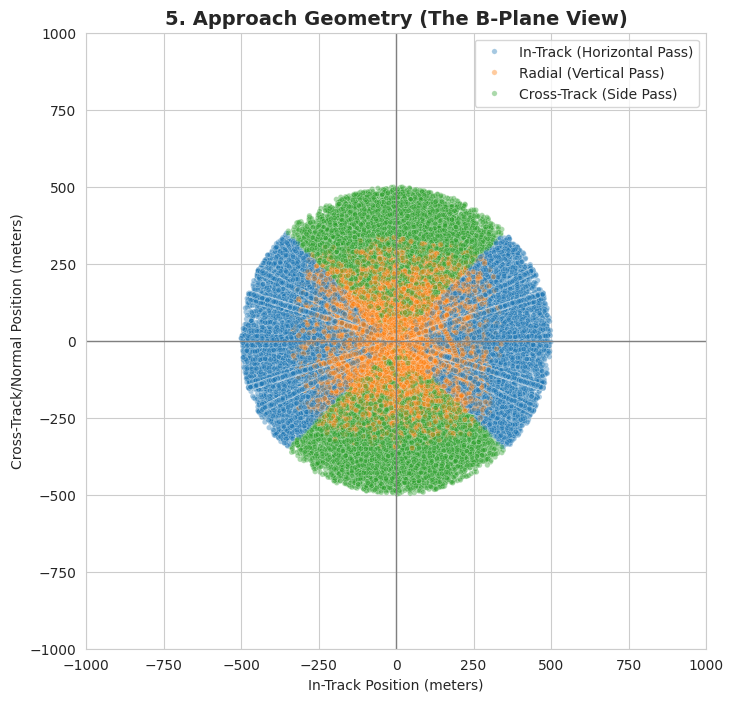

In [ ]:
plt.figure(figsize=(8, 8))
if 'relative_position_t' in df.columns and 'relative_position_n' in df.columns:
    sns.scatterplot(
        data=df,
        x='relative_position_t',
        y='relative_position_n',
        hue='geometry_type',
        alpha=0.4,
        s=15
    )
    plt.title('5. Approach Geometry (The B-Plane View)', fontweight='bold', fontsize=14)
    plt.xlabel('In-Track Position (meters)')
    plt.ylabel('Cross-Track/Normal Position (meters)')
    # Zoom in on the center to see the close calls
    plt.xlim(-1000, 1000)
    plt.ylim(-1000, 1000)
    plt.axhline(0, color='grey', lw=1)
    plt.axvline(0, color='grey', lw=1)
    plt.legend()
plt.show()

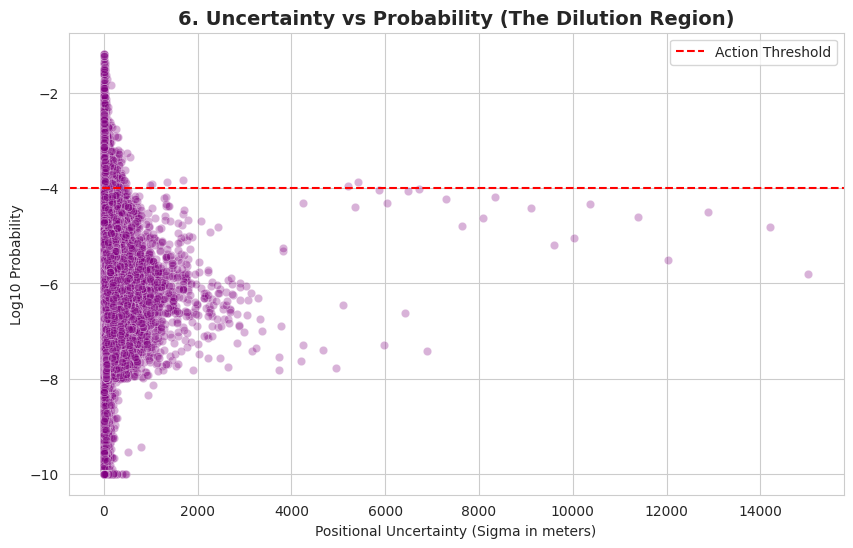

In [ ]:
plt.figure(figsize=(10, 6))
if 'object1_cn_n' in df.columns:
    # Calculate Sigma (Standard Deviation) from Covariance
    df['uncertainty_sigma'] = np.sqrt(df['object1_cn_n'].abs())

    sns.scatterplot(
        data=df,
        x='uncertainty_sigma',
        y='log_collision_prob',
        alpha=0.3,
        color='purple'
    )
    plt.title('6. Uncertainty vs Probability (The Dilution Region)', fontweight='bold', fontsize=14)
    plt.xlabel('Positional Uncertainty (Sigma in meters)')
    plt.ylabel('Log10 Probability')
    plt.axhline(np.log10(1e-4), color='red', linestyle='--', label='Action Threshold')
    plt.legend()
plt.show()

/tmp/ipython-input-2864561083.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=obj_counts.index, y=obj_counts.values, palette='magma')


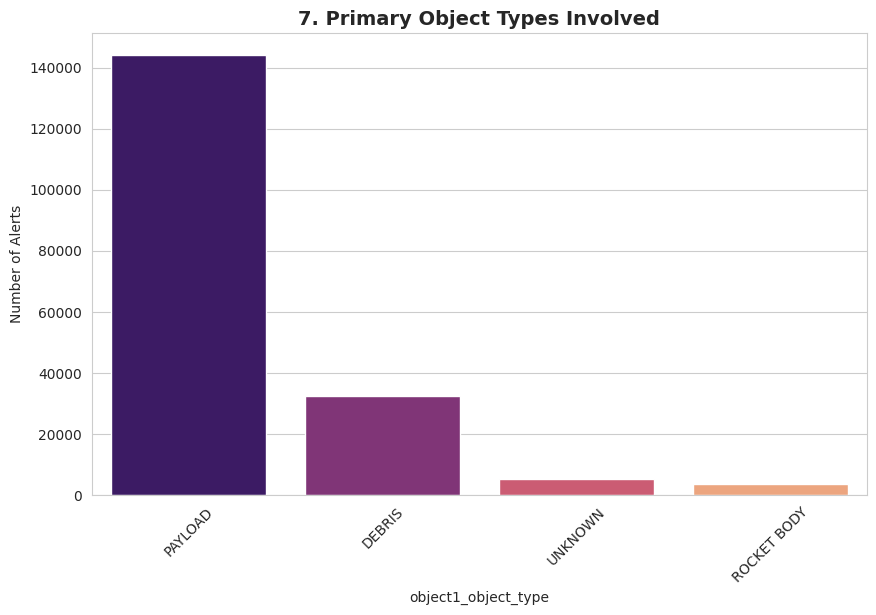

In [ ]:
plt.figure(figsize=(10, 6))
obj_counts = df['object1_object_type'].value_counts()
sns.barplot(x=obj_counts.index, y=obj_counts.values, palette='magma')
plt.title('7. Primary Object Types Involved', fontweight='bold', fontsize=14)
plt.ylabel('Number of Alerts')
plt.xticks(rotation=45)
plt.show()

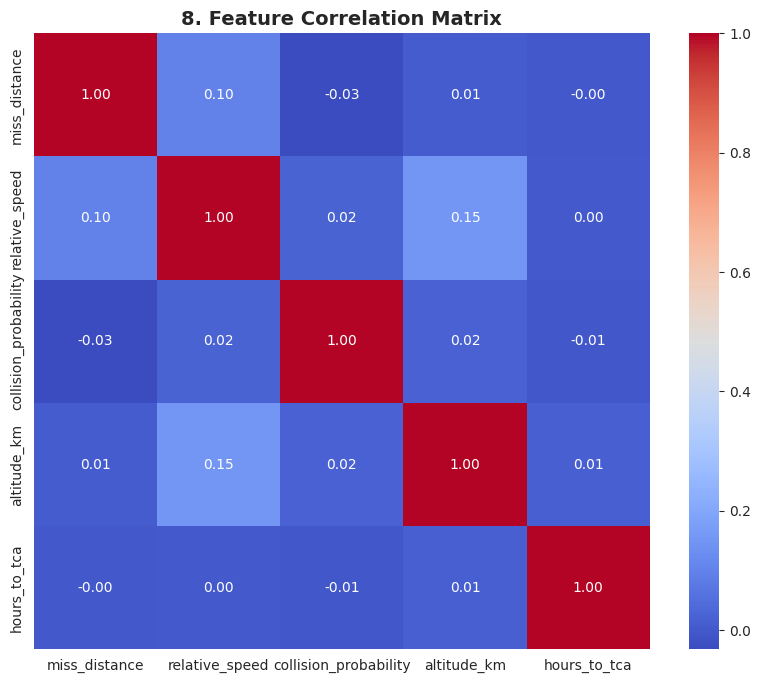

In [ ]:
plt.figure(figsize=(10, 8))
corr_cols = ['miss_distance', 'relative_speed', 'collision_probability', 'altitude_km', 'hours_to_tca']
# Drop NA values for correlation calculation
corr_matrix = df[corr_cols].dropna().corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('8. Feature Correlation Matrix', fontweight='bold', fontsize=14)
plt.show()

# ML

In [ ]:
possible_pc_cols = [c for c in df.columns if 'pc' in c.lower() or 'prob' in c.lower()]

print("Possible Pc columns:", possible_pc_cols)

Possible Pc columns: ['collision_probability', 'collision_max_probability', 'object1_area_pc', 'object1_area_pc_max', 'object2_area_pc', 'object2_area_pc_max', 'log_collision_prob']


In [ ]:
df['target'] = (df['collision_probability'] >= 1e-4).astype(int)

In [ ]:
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.985176
1,0.014824


--- LOADING DATA ---


Downloading...
From (original): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti
From (redirected): https://drive.google.com/uc?id=1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti&confirm=t&uuid=eda57a1a-8fd7-4ba0-bab8-d0f540aa704a
To: /content/2024_S1_cdm_ccsds_AE.csv
100%|██████████| 168M/168M [00:01<00:00, 152MB/s]


Data Loaded. Shape after constant-col drop: (185511, 52)
--- ADDING FEATURES ---
Feature Engineering Complete. Shape: (185511, 57)
--- TARGET DISTRIBUTION ---
target
0    0.985176
1    0.014824
Name: proportion, dtype: float64
Numeric features: 38
Categorical features: 7
Train size: (129857, 45) Positives: 1925
Val size  : (27827, 45) Positives: 413
Test size : (27827, 45) Positives: 412
Processed feature dimension: 15833


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 15833)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     2,026,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,038,017 (7.77 MB)

 Trainable params: 2,037,569 (7.77 MB)

 Non-trainable params: 448 (1.75 KB)

Class weights: {0: np.float64(0.507523528124316), 1: np.float64(33.72909090909091)}
Epoch 1/100
508/508 - 46s - 90ms/step - auc_pr: 0.5285 - auc_roc: 0.9702 - loss: 0.2657 - val_auc_pr: 0.8746 - val_auc_roc: 0.9980 - val_loss: 0.0806 - learning_rate: 1.0000e-03
Epoch 2/100
508/508 - 43s - 84ms/step - auc_pr: 0.7400 - auc_roc: 0.9953 - loss: 0.0856 - val_auc_pr: 0.8607 - val_auc_roc: 0.9979 - val_loss: 0.0819 - learning_rate: 1.0000e-03
Epoch 3/100
508/508 - 83s - 162ms/step - auc_pr: 0.8183 - auc_roc: 0.9974 - loss: 0.0532 - val_auc_pr: 0.9053 - val_auc_roc: 0.9967 - val_loss: 0.0374 - learning_rate: 1.0000e-03
Epoch 4/100
508/508 - 39s - 78ms/step - auc_pr: 0.8659 - auc_roc: 0.9981 - loss: 0.0397 - val_auc_pr: 0.8421 - val_auc_roc: 0.9979 - val_loss: 0.0415 - learning_rate: 1.0000e-03
Epoch 5/100
508/508 - 40s - 79ms/step - auc_pr: 0.8781 - auc_roc: 0.9986 - loss: 0.0347 - val_auc_pr: 0.8674 - val_auc_roc: 0.9979 - val_loss: 0.0303 - learning_rate: 1.0000e-03
Epoch 6/100
508/508 - 40s

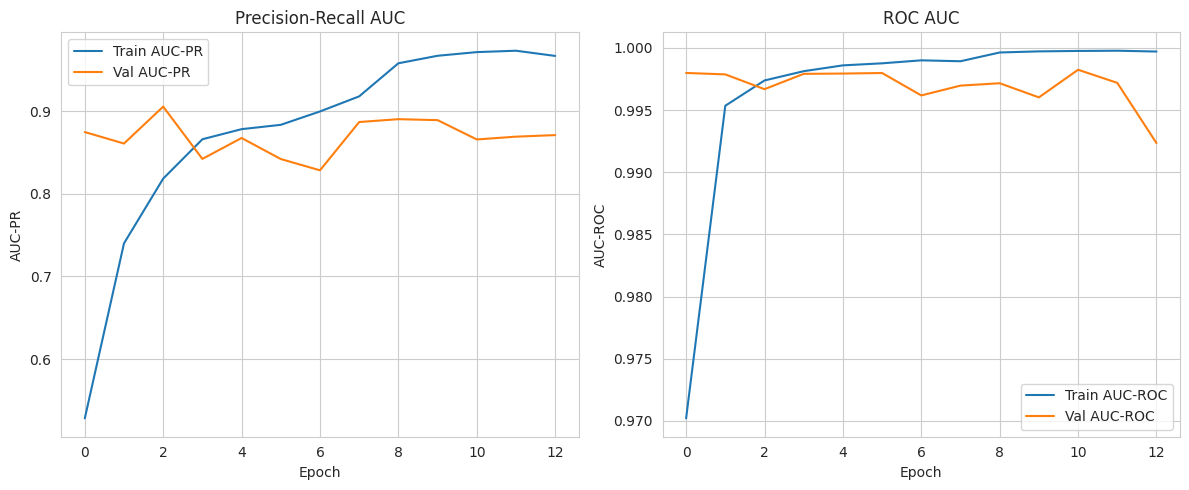

870/870 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Validation PR-AUC:  0.9192
Validation ROC-AUC: 0.9963
Best validation threshold: 0.9628
At that threshold: Precision=0.8600, Recall=0.8329, F1=0.8462


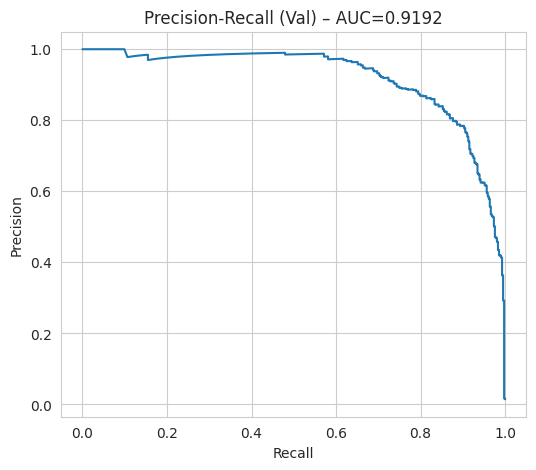

870/870 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
--- TEST METRICS ---
ROC-AUC : 0.9989680371279985
PR-AUC  : 0.9545435330589178

Classification Report (threshold tuned):
              precision    recall  f1-score   support

           0     0.9981    0.9984    0.9983     27415
           1     0.8936    0.8762    0.8848       412

    accuracy                         0.9966     27827
   macro avg     0.9459    0.9373    0.9415     27827
weighted avg     0.9966    0.9966    0.9966     27827



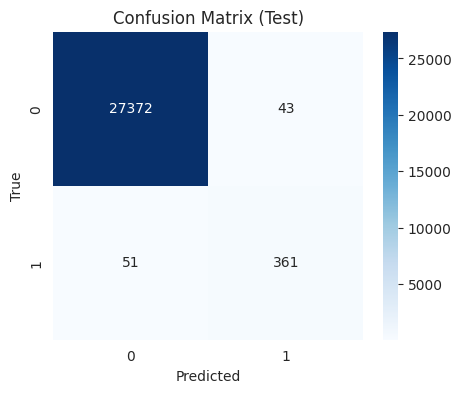

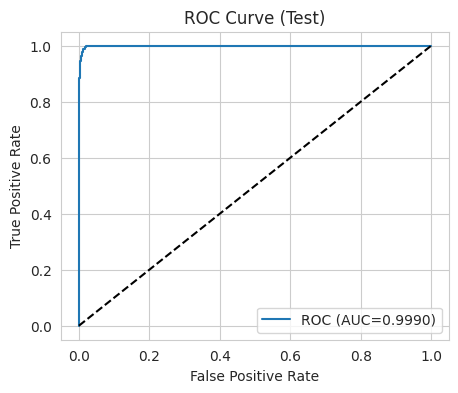

Saved model and preprocessor to ./models
Pipeline ready. You can now train, evaluate, and reuse the deep model.


In [ ]:
# ============================================================
# 0. Imports & Configuration
# ============================================================
import os
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    roc_curve
)
from sklearn.utils import class_weight
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sns.set_style("whitegrid")
np.random.seed(42)
tf.random.set_seed(42)

# Your Google Drive source (same as in your notebook)
DATA_SOURCE = 'https://drive.google.com/file/d/1e5sWHP0Hzxkw0VGPJr9D5J8ZYWNkx3Ti/view?usp=sharing'


# ============================================================
# 1. Load & Basic Cleaning (similar to your notebook)
# ============================================================
def load_data(source: str) -> pd.DataFrame:
    print("--- LOADING DATA ---")
    target_file = source
    if 'drive.google.com' in source or 'http' in source:
        target_file = gdown.download(source, quiet=False, fuzzy=True)

    df = pd.read_csv(target_file, low_memory=False)

    # Drop constant / empty columns to save memory
    nunique = df.nunique()
    cols_to_drop = nunique[nunique <= 1].index
    df = df.drop(cols_to_drop, axis=1)

    # Parse date/time columns
    date_cols = ['tca', 'start_screen_period', 'stop_screen_period', 'creation_date']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    print(f"Data Loaded. Shape after constant-col drop: {df.shape}")
    return df


df = load_data(DATA_SOURCE)


# ============================================================
# 2. Feature Engineering (aligned with your notebook)
# ============================================================
print("--- ADDING FEATURES ---")

# 1) Log10 of collision probability (avoid log(0))
df['log_collision_prob'] = np.log10(df['collision_probability'].replace(0, 1e-30))

# 2) Altitude (km) for object1 from state vector (x, y, z)
if all(col in df.columns for col in ['object1_x', 'object1_y', 'object1_z']):
    R = np.sqrt(df['object1_x']**2 + df['object1_y']**2 + df['object1_z']**2)
    df['altitude_km'] = R - 6378.137  # Earth radius in km
    # Filter out extreme outliers (100km to 40,000km)
    df = df[(df['altitude_km'] > 100) & (df['altitude_km'] < 40000)]

# 3) Risk label (for plots / sanity check, not used directly by the model)
# 1e-4 ~ common "red alert" threshold
THRESHOLD_PC = 1e-4
df['risk_label'] = np.where(df['collision_probability'] >= THRESHOLD_PC,
                            'High Risk', 'Low Risk')

# 4) Conjunction geometry type (radial / in-track / cross-track)
def classify_geometry(row):
    r = abs(row.get('relative_position_r', 0))
    t = abs(row.get('relative_position_t', 0))
    n = abs(row.get('relative_position_n', 0))
    if r > t and r > n:
        return 'Radial (Vertical Pass)'
    elif t > r and t > n:
        return 'In-Track (Horizontal Pass)'
    else:
        return 'Cross-Track (Side Pass)'

if all(c in df.columns for c in ['relative_position_r', 'relative_position_t', 'relative_position_n']):
    df['geometry_type'] = df.apply(classify_geometry, axis=1)

# 5) Warning time: hours from screening start to TCA
if 'start_screen_period' in df.columns and 'tca' in df.columns:
    df['hours_to_tca'] = (df['tca'] - df['start_screen_period']).dt.total_seconds() / 3600

print(f"Feature Engineering Complete. Shape: {df.shape}")


# ============================================================
# 3. Define Target for Alert Classification
# ============================================================
# Binary target: 1 = alert (high collision probability), 0 = non-alert
df['target'] = (df['collision_probability'] >= THRESHOLD_PC).astype(int)

print("--- TARGET DISTRIBUTION ---")
print(df['target'].value_counts(normalize=True))


# ============================================================
# 4. Train/Val/Test Split (Stratified)
# ============================================================
# Drop obvious identifiers that don’t carry physical meaning
id_like_cols = [
    'conjunction_id', 'event_id', 'message_id',
    'object1_object_designator', 'object2_object_designator',
    'object1_international_designator', 'object2_international_designator'
]
existing_id_cols = [c for c in id_like_cols if c in df.columns]

# Feature candidates: everything except target, date/time raw, and IDs
drop_cols = ['target', 'risk_label', 'creation_date', 'tca',
             'start_screen_period', 'stop_screen_period'] + existing_id_cols
drop_cols = [c for c in drop_cols if c in df.columns]

feature_df = df.drop(columns=drop_cols)
target = df['target']

# Identify numeric & categorical columns
numeric_cols = feature_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = feature_df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric features: {len(numeric_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

X_train, X_temp, y_train, y_temp = train_test_split(
    feature_df, target,
    test_size=0.30,
    random_state=42,
    stratify=target
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,  # 15% val, 15% test overall
    random_state=42,
    stratify=y_temp
)

print("Train size:", X_train.shape, "Positives:", y_train.sum())
print("Val size  :", X_val.shape, "Positives:", y_val.sum())
print("Test size :", X_test.shape, "Positives:", y_test.sum())


# ============================================================
# 5. Preprocessing Pipeline (Scaling + One-Hot)
# ============================================================
numeric_cols = feature_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = feature_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Numeric: median imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical: most_frequent imputation + one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit on training only, transform all splits
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc   = preprocessor.transform(X_val)
X_test_proc  = preprocessor.transform(X_test)

input_dim = X_train_proc.shape[1]
print("Processed feature dimension:", input_dim)


# ============================================================
# 6. Build Deep Learning Model (Keras)
#    – uses class weights to handle 98.5 / 1.5 imbalance
# ============================================================
def build_model(input_dim: int) -> keras.Model:
    inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(32, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',  # we handle imbalance via class_weight below
        metrics=[
            keras.metrics.AUC(name='auc_roc'),
            keras.metrics.AUC(name='auc_pr', curve='PR')
        ]
    )
    return model


model = build_model(input_dim)
model.summary()


# Optional: Focal Loss (if you want to replace BCE)
# def focal_loss(alpha=0.25, gamma=2.0):
#     def loss(y_true, y_pred):
#         y_true = tf.cast(y_true, tf.float32)
#         bce = keras.backend.binary_crossentropy(y_true, y_pred)
#         pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
#         focal_factor = alpha * keras.backend.pow((1 - pt), gamma)
#         return keras.backend.mean(focal_factor * bce)
#     return loss
#
# model.compile(optimizer='adam', loss=focal_loss(), metrics=[...])


# ============================================================
# 7. Compute Class Weights (for imbalance)
# ============================================================
cls_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: cls_weights[0], 1: cls_weights[1]}
print("Class weights:", class_weight_dict)


# ============================================================
# 8. Train Model with Early Stopping
# ============================================================
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_auc_pr',
        mode='max',
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_auc_pr',
        mode='max',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

history = model.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=100,
    batch_size=256,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=2
)


# ============================================================
# 9. Training Curves
# ============================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['auc_pr'], label='Train AUC-PR')
plt.plot(history.history['val_auc_pr'], label='Val AUC-PR')
plt.xlabel('Epoch'); plt.ylabel('AUC-PR')
plt.title('Precision-Recall AUC'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['auc_roc'], label='Train AUC-ROC')
plt.plot(history.history['val_auc_roc'], label='Val AUC-ROC')
plt.xlabel('Epoch'); plt.ylabel('AUC-ROC')
plt.title('ROC AUC'); plt.legend()

plt.tight_layout()
plt.show()


# ============================================================
# 10. Threshold Tuning on Validation Set
#      (0.5 is usually bad for imbalanced problems)
# ============================================================
val_probs = model.predict(X_val_proc).ravel()

precision, recall, thresholds = precision_recall_curve(y_val, val_probs)
pr_auc_val = average_precision_score(y_val, val_probs)
roc_auc_val = roc_auc_score(y_val, val_probs)
print(f"Validation PR-AUC:  {pr_auc_val:.4f}")
print(f"Validation ROC-AUC: {roc_auc_val:.4f}")

# Choose threshold that maximizes F1 on validation
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

print(f"Best validation threshold: {best_threshold:.4f}")
print(f"At that threshold: Precision={precision[best_idx]:.4f}, Recall={recall[best_idx]:.4f}, F1={f1_scores[best_idx]:.4f}")

plt.figure(figsize=(6, 5))
plt.plot(recall, precision)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.title(f'Precision-Recall (Val) – AUC={pr_auc_val:.4f}')
plt.grid(True)
plt.show()


# ============================================================
# 11. Final Evaluation on Test Set
# ============================================================
test_probs = model.predict(X_test_proc).ravel()
test_pred = (test_probs >= best_threshold).astype(int)

print("--- TEST METRICS ---")
print("ROC-AUC :", roc_auc_score(y_test, test_probs))
print("PR-AUC  :", average_precision_score(y_test, test_probs))
print("\nClassification Report (threshold tuned):")
print(classification_report(y_test, test_pred, digits=4))

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

# ROC curve on test
fpr, tpr, _ = roc_curve(y_test, test_probs)
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc_score(y_test, test_probs):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.grid(True)
plt.show()


# ============================================================
# 12. Save Model & Preprocessor for Future Use
# ============================================================
os.makedirs("models", exist_ok=True)
model.save("models/space_debris_alert_model.h5")
joblib.dump(preprocessor, "models/space_debris_preprocessor.pkl")
print("Saved model and preprocessor to ./models")


# ============================================================
# 13. Helper: Predict on a Single New CDM Row
# ============================================================
def predict_alert(single_row: pd.DataFrame,
                  model_path="models/space_debris_alert_model.h5",
                  preproc_path="models/space_debris_preprocessor.pkl",
                  threshold: float = None):
    """
    single_row: DataFrame with the same raw columns as original df (1 row).
    threshold: If None, uses 0.5; pass best_threshold for tuned decision rule.
    """
    loaded_model = keras.models.load_model(model_path)
    loaded_preproc = joblib.load(preproc_path)

    # Recreate engineered features in the same way:
    row = single_row.copy()

    row['log_collision_prob'] = np.log10(row['collision_probability'].replace(0, 1e-30))

    if all(col in row.columns for col in ['object1_x', 'object1_y', 'object1_z']):
        R = np.sqrt(row['object1_x']**2 + row['object1_y']**2 + row['object1_z']**2)
        row['altitude_km'] = R - 6378.137

    if 'start_screen_period' in row.columns and 'tca' in row.columns:
        row['start_screen_period'] = pd.to_datetime(row['start_screen_period'], errors='coerce')
        row['tca'] = pd.to_datetime(row['tca'], errors='coerce')
        row['hours_to_tca'] = (row['tca'] - row['start_screen_period']).dt.total_seconds() / 3600

    # Drop same columns as training
    row = row.drop(columns=[c for c in drop_cols if c in row.columns], errors='ignore')

    X_proc = loaded_preproc.transform(row)
    prob = loaded_model.predict(X_proc).ravel()[0]

    if threshold is None:
        threshold = 0.5

    alert_flag = int(prob >= threshold)
    return prob, alert_flag


print("Pipeline ready. You can now train, evaluate, and reuse the deep model.")


In [ ]:
best_val_pr_auc = max(history.history['val_auc_pr'])
print("Best Validation PR-AUC:", best_val_pr_auc)

Best Validation PR-AUC: 0.9053353071212769



Training config: medium_bce
Epoch 1/80
508/508 - 47s - 92ms/step - auc_pr: 0.5190 - auc_roc: 0.9692 - loss: 0.2757 - val_auc_pr: 0.8791 - val_auc_roc: 0.9975 - val_loss: 0.0975 - learning_rate: 1.0000e-03
Epoch 2/80
508/508 - 39s - 76ms/step - auc_pr: 0.7060 - auc_roc: 0.9950 - loss: 0.0906 - val_auc_pr: 0.8661 - val_auc_roc: 0.9976 - val_loss: 0.0516 - learning_rate: 1.0000e-03
Epoch 3/80
508/508 - 41s - 81ms/step - auc_pr: 0.7808 - auc_roc: 0.9969 - loss: 0.0613 - val_auc_pr: 0.9017 - val_auc_roc: 0.9985 - val_loss: 0.0326 - learning_rate: 1.0000e-03
Epoch 4/80
508/508 - 79s - 156ms/step - auc_pr: 0.8593 - auc_roc: 0.9981 - loss: 0.0400 - val_auc_pr: 0.8702 - val_auc_roc: 0.9979 - val_loss: 0.0376 - learning_rate: 1.0000e-03
Epoch 5/80
508/508 - 39s - 76ms/step - auc_pr: 0.8682 - auc_roc: 0.9985 - loss: 0.0353 - val_auc_pr: 0.8376 - val_auc_roc: 0.9976 - val_loss: 0.0446 - learning_rate: 1.0000e-03
Epoch 6/80
508/508 - 40s - 79ms/step - auc_pr: 0.8920 - auc_roc: 0.9989 - loss: 0.027

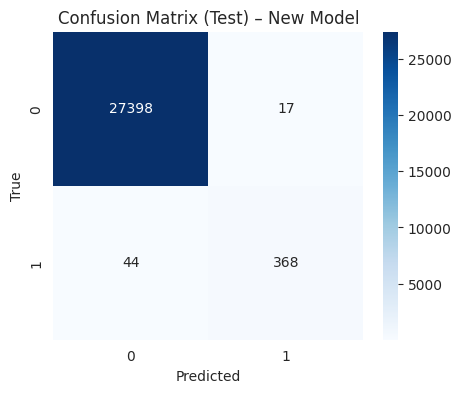

✅ New improved model and preprocessor saved in ./models


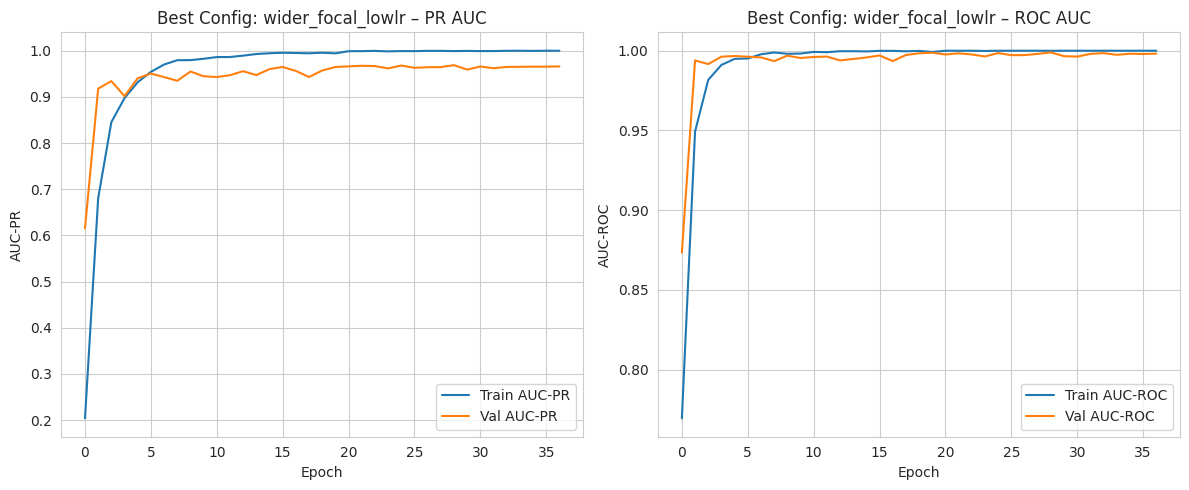

In [ ]:
# ============================================================
# FOLLOW-UP: Try to Improve the Model (Hyperparameter Search)
# ============================================================
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1) Put your previous best validation PR-AUC here
#    (From the first model you trained earlier)
BASELINE_VAL_PR_AUC = 0.9053353071212769


# ------------------------------------------------------------
# Focal Loss (for imbalanced classification)
# ------------------------------------------------------------
def focal_loss(alpha=0.25, gamma=2.0):
    """
    Focal loss for binary classification.
    alpha: weight given to positive examples (rare class)
    gamma: focusing parameter (higher -> focus more on hard examples)
    """
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, keras.backend.epsilon(), 1.0 - keras.backend.epsilon())

        bce = keras.backend.binary_crossentropy(y_true, y_pred)
        pt  = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_factor = alpha * keras.backend.pow((1.0 - pt), gamma)
        return keras.backend.mean(focal_factor * bce)
    return loss


# ------------------------------------------------------------
# Model builder with configurable depth/width/dropout/lr
# ------------------------------------------------------------
def build_dl_model(input_dim, hidden_layers, dropout_rate, learning_rate, use_focal=False):
    inputs = keras.Input(shape=(input_dim,))
    x = inputs

    for units in hidden_layers:
        x = layers.Dense(units, activation='relu')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)

    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    if use_focal:
        loss_fn = focal_loss(alpha=0.25, gamma=2.0)
    else:
        loss_fn = 'binary_crossentropy'

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss_fn,
        metrics=[
            keras.metrics.AUC(name='auc_roc'),
            keras.metrics.AUC(name='auc_pr', curve='PR')
        ]
    )
    return model


# ------------------------------------------------------------
# Hyperparameter configurations to try
# ------------------------------------------------------------
configs = [
    {
        "name": "medium_bce",
        "hidden_layers": [128, 64, 32],
        "dropout": 0.3,
        "lr": 1e-3,
        "use_focal": False
    },
    {
        "name": "medium_focal",
        "hidden_layers": [128, 64, 32],
        "dropout": 0.3,
        "lr": 1e-3,
        "use_focal": True
    },
    {
        "name": "deeper_focal",
        "hidden_layers": [256, 128, 64, 32],
        "dropout": 0.35,
        "lr": 7e-4,
        "use_focal": True
    },
    {
        "name": "wider_focal_lowlr",
        "hidden_layers": [256, 256, 64],
        "dropout": 0.4,
        "lr": 5e-4,
        "use_focal": True
    },
]

input_dim = X_train_proc.shape[1]

best_config_name = None
best_val_pr_auc = -np.inf
best_model = None
best_history = None

# ------------------------------------------------------------
# Loop over configs and train models
# ------------------------------------------------------------
for cfg in configs:
    print("\n" + "=" * 60)
    print(f"Training config: {cfg['name']}")
    print("=" * 60)

    model_candidate = build_dl_model(
        input_dim=input_dim,
        hidden_layers=cfg["hidden_layers"],
        dropout_rate=cfg["dropout"],
        learning_rate=cfg["lr"],
        use_focal=cfg["use_focal"]
    )

    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_auc_pr',
            mode='max',
            patience=8,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_auc_pr',
            mode='max',
            factor=0.5,
            patience=4,
            min_lr=1e-6
        )
    ]

    history = model_candidate.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=80,
        batch_size=256,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=2
    )

    # Get best val AUC-PR from this run
    val_auc_pr_history = history.history['val_auc_pr']
    max_val_pr_auc = max(val_auc_pr_history)
    print(f"Config '{cfg['name']}' – best val AUC-PR: {max_val_pr_auc:.5f}")

    # Update global best
    if max_val_pr_auc > best_val_pr_auc:
        best_val_pr_auc = max_val_pr_auc
        best_config_name = cfg["name"]
        best_model = model_candidate
        best_history = history


print("\n" + "#" * 60)
print(f"BEST CONFIG ACROSS RUNS: {best_config_name}")
print(f"BEST VALIDATION AUC-PR : {best_val_pr_auc:.5f}")
print(f"BASELINE VAL AUC-PR    : {BASELINE_VAL_PR_AUC:.5f}")
print("#" * 60)


# ------------------------------------------------------------
# Decide whether to keep the new model or the old one
# ------------------------------------------------------------
if best_val_pr_auc > BASELINE_VAL_PR_AUC:
    print("🎉 New model is better than baseline! Saving it as the new production model...")

    # Evaluate on test set with threshold tuning (again)
    test_probs_new = best_model.predict(X_val_proc).ravel()
    precision, recall, thresholds = precision_recall_curve(y_val, test_probs_new)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-12)
    best_idx = np.argmax(f1_scores)
    best_threshold_new = thresholds[best_idx] if best_idx < len(thresholds) else 0.5

    print(f"Best threshold (new model): {best_threshold_new:.4f}")
    print(f"At that threshold (val set): P={precision[best_idx]:.4f}, R={recall[best_idx]:.4f}, F1={f1_scores[best_idx]:.4f}")

    # Evaluate on TEST set with this threshold
    test_probs = best_model.predict(X_test_proc).ravel()
    test_pred = (test_probs >= best_threshold_new).astype(int)

    print("\n--- NEW MODEL TEST METRICS ---")
    print("ROC-AUC :", roc_auc_score(y_test, test_probs))
    print("PR-AUC  :", average_precision_score(y_test, test_probs))
    print("\nClassification Report (new model):")
    print(classification_report(y_test, test_pred, digits=4))

    cm = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('True')
    plt.title('Confusion Matrix (Test) – New Model')
    plt.show()

    # Save new model + preprocessor + threshold
    os.makedirs("models", exist_ok=True)
    best_model.save("models/space_debris_alert_model_improved.h5")
    joblib.dump(preprocessor, "models/space_debris_preprocessor_improved.pkl")

    # Save threshold for later use
    with open("models/space_debris_threshold_improved.txt", "w") as f:
        f.write(str(best_threshold_new))

    print("✅ New improved model and preprocessor saved in ./models")

else:
    print("⚠️ None of the new models beat the baseline validation AUC-PR.")
    print("   Keep using the previous model. No files were overwritten.")


# ------------------------------------------------------------
# (Optional) Plot training curves of the best config
# ------------------------------------------------------------
if best_history is not None:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(best_history.history['auc_pr'], label='Train AUC-PR')
    plt.plot(best_history.history['val_auc_pr'], label='Val AUC-PR')
    plt.xlabel('Epoch'); plt.ylabel('AUC-PR')
    plt.title(f'Best Config: {best_config_name} – PR AUC')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(best_history.history['auc_roc'], label='Train AUC-ROC')
    plt.plot(best_history.history['val_auc_roc'], label='Val AUC-ROC')
    plt.xlabel('Epoch'); plt.ylabel('AUC-ROC')
    plt.title(f'Best Config: {best_config_name} – ROC AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import files

model.save('space_debris_model.keras')

files.download('space_debris_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>